In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['font.family'] ='Times New Roman'

In [37]:
# this is the data for the energy of the centaurs with dt=5, with approx 27,000 years
# the full code (below) could not be uploaded to the repository as the file size was too large
energy5_half = np.genfromtxt("Data/energyTesting/centaurEnergy5dt.csv", delimiter=',')

In [4]:
# this is the full data for the energy of the centaurs with dt=5
# this covers the energy loss over the full simulation (54,757 years)
filepath = ''
try:
    energy5 = np.genfromtxt(filepath, delimiter=',')
except:
    print("Please download the data from the google drive.")

Please download the data from the google drive.


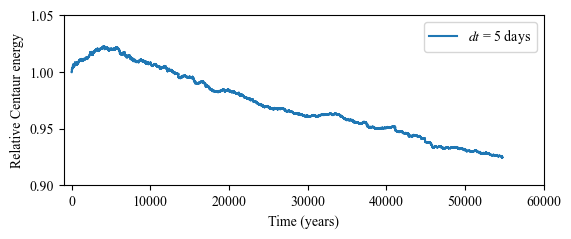

In [36]:
t_values = np.arange(0, 2e7, 5) / 365.25
y_values = energy5 / energy5[0]

plt.figure(figsize=(6, 2.5))
plt.plot(t_values, y_values, label=r'$dt$ = 5 days')
plt.xlim(-1000, 60000)
plt.legend()
plt.ylim(0.90, 1.05)
plt.yticks(np.arange(0.9, 1.06, 0.05))
plt.xlabel("Time (years)")
plt.ylabel("Relative Centaur energy")

plt.subplots_adjust(left=0.1, bottom=0.2)
plt.savefig("Figures/centaurEnergy.png", dpi=1000)
plt.show()

The results of for the research question:

In [9]:
GMjupiter = ['0.00', '0.20', '0.40', '0.60', '0.80', '1.00', '1.20', '1.40', '1.60', '1.80', '2.00']
GMjupiter = np.flip(GMjupiter)
nCentaurs = 24375

In [ ]:
# import data
inner = []
totalInner = []
outer = []
totalOuter = []
impact = []
totalImpact = []
for GM in GMjupiter:
    data = np.genfromtxt(f"Data/hypothesis/steps4e6dt5/inner{GM}.csv", delimiter=',')
    inner.append(data)
    totalInner.append(data[-1])

    data = np.genfromtxt(f"Data/hypothesis/steps4e6dt5/outer{GM}.csv", delimiter=',')
    outer.append(data)
    totalOuter.append(data[-1])

    data = np.genfromtxt(f"Data/hypothesis/steps4e6dt5/impact{GM}.csv", delimiter=',')
    impact.append(data)
    totalImpact.append(data[-1])

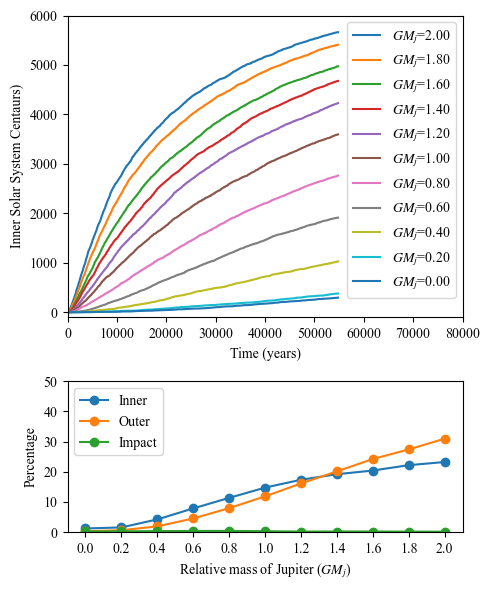

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6), gridspec_kw={'height_ratios': [2, 1]}, tight_layout=True)

for i in range(len(inner)):
    ax1.plot(np.arange(0, 4e6*5, 5) / 365, inner[i], label=f'$GM_j$={GMjupiter[i]}')

ax1.set_xlabel("Time (years)")
ax1.set_ylabel("Inner Solar System Centaurs)")
ax1.set_xlim(0, 80000)
ax1.set_ylim(-100, 6000)
ax1.legend(loc=1)

ax2.errorbar(np.arange(0, 2.1, 0.2), 100 * np.flip(totalInner) / nCentaurs, label='Inner', marker='o')
ax2.errorbar(np.arange(0, 2.1, 0.2), 100 * np.flip(totalOuter) / nCentaurs, label='Outer', marker='o')
ax2.errorbar(np.arange(0, 2.1, 0.2), 100 * np.flip(totalImpact) / nCentaurs, label='Impact', marker='o')

ax2.set_xlim(-0.1, 2.1)
ax2.set_xticks(np.arange(0, 2.1, 0.2))
ax2.set_ylim(0, 50)
ax2.set_xlabel('Relative mass of Jupiter ($GM_j$)')
ax2.set_ylabel('Percentage')
ax2.legend(loc=2)

plt.savefig("Figures/combined_figure.png", dpi=1000)

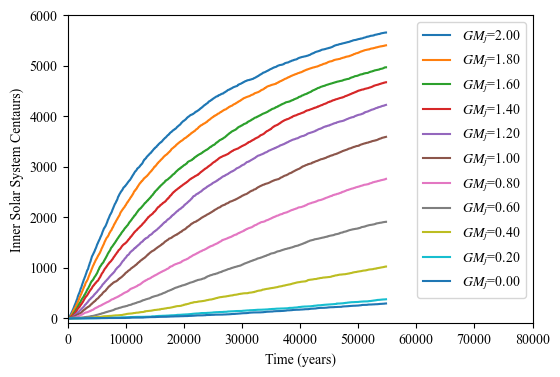

In [11]:
plt.figure(figsize=(6, 4))
plt.tight_layout()
for i in range(len(inner)):
    plt.plot(np.arange(0, 4e6*5, 5) / 365, inner[i], label=f'$GM_j$={GMjupiter[i]}')
plt.xlabel("Time (years)")
plt.ylabel("Inner Solar System Centaurs)")
plt.xlim(0, 80000)
plt.ylim(-100, 6000)
plt.legend(loc=1)
plt.savefig("Figures/innerOverTime.png", dpi=1000)

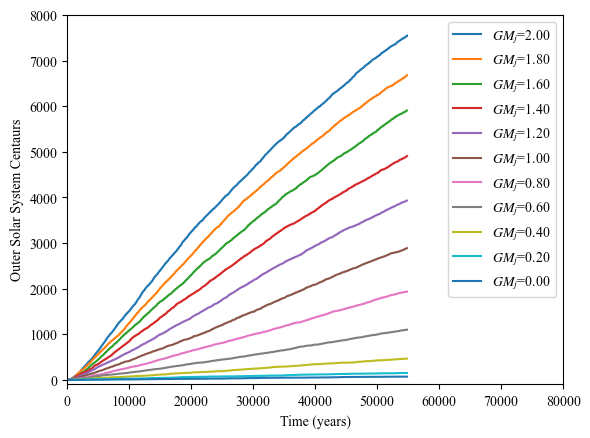

In [12]:
for i in range(len(outer)):
    plt.plot(np.arange(0, 4e6*5, 5) / 365, outer[i], label=f'$GM_j$={GMjupiter[i]}')
plt.xlabel("Time (years)")
plt.ylabel("Outer Solar System Centaurs")
plt.xlim(0, 80000)
plt.ylim(-100, 8000)
plt.legend(loc=1)

Text(0, 0.5, 'Gas giant impacts')

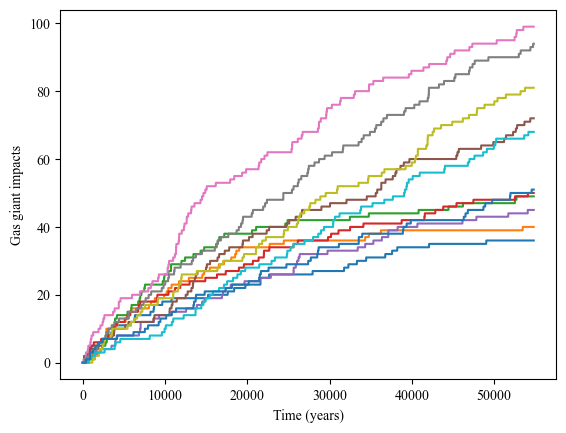

In [13]:
for i in range(len(impact)):
    plt.plot(np.arange(0, 4e6*5, 5) / 365, impact[i], label=f'$GM_j$={GMjupiter[i]}')
plt.xlabel("Time (years)")
plt.ylabel("Gas giant impacts")
# plt.xlim(0, 55000)
# plt.ylim(-0.01, 1)

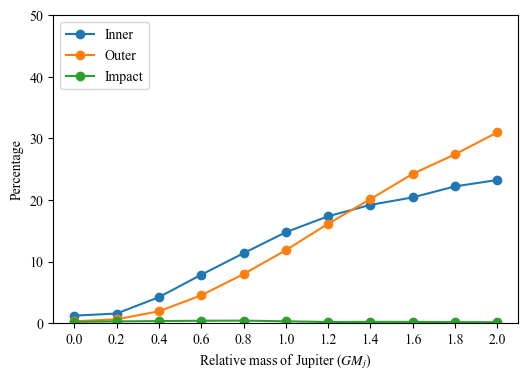

In [14]:
plt.figure(figsize=(6, 4))
plt.tight_layout()

plt.errorbar(np.arange(0, 2.1, 0.2), 100*np.flip(totalInner) / nCentaurs, label='Inner', marker='o')
plt.errorbar(np.arange(0, 2.1, 0.2), 100*np.flip(totalOuter) / nCentaurs, label='Outer', marker='o')
plt.errorbar(np.arange(0, 2.1, 0.2), 100*np.flip(totalImpact) / nCentaurs, label='Impact', marker='o')

plt.xlim(-0.1, 2.1)
plt.xticks(np.arange(0, 2.1, 0.2))
plt.ylim(0, 50)
plt.xlabel('Relative mass of Jupiter ($GM_j$)')
plt.ylabel('Percentage')
plt.legend(loc=2)
plt.savefig("Figures/hypothesis.png", dpi=1000)